## 导入相应的库

In [3]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [4]:
train  = pd.read_csv('train_E6oV3lV.csv')
test = pd.read_csv('test_tweets_anuFYb8.csv')

记得检查一下训练集的前几行，看看有没有问题：

In [5]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


## 数据清理

这些数据是网上[一个黑客松挑战项目](https://datahack.analyticsvidhya.com/contest/practice-problem-twitter-sentiment-analysis/)的测试源码，网站为了照顾隐私，数据集把用户名一致标记为@user、一些标点符号，还有一些没意义的短语等，属于不必要的数据，需要做一定的清理。

## 1. 删除推文句柄@user

把训练集和清理版数据合并在combi，把两边的句柄同时删掉，防止之后进行重复操作

In [6]:
combi = train.append(test, ignore_index=True)

定义函数，用于删除推文中不需要的内容。它有两个参数，一个是原始文本字符串，另一个是要从字符串中删去的内容：

In [7]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)

    return input_txt


re.sub用于替换字符串中的匹配项。re.sub(pattern, repl, string, count=0, flags=0)

* pattern是模式；
* repl是替换规则，可以为字符串，也可以是函数；
* string是被替换的字符串；
* count是替换的最大次数，默认为0；
* flag是位置，默认为0；
* 意思是将string中符合pattern的字符替换为repl或者按repl规则进行替换。

创建一个新列tidy_tweet，它将包含已清理和处理过的推文。请注意，我们已将“@ [\ w] *”作为模式传递给remove_pattern函数。它实际上是一个正则表达式，它将选择以'@'开头的任何单词。

In [8]:
combi ['tidy_tweet'] = np.vectorize(remove_pattern)(combi ['tweet'] ,"@[\w]*")

In [9]:
combi

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so #gr8 !


## 2. 删除标点符号、数字和特殊字符

In [10]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [11]:
combi


,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so #gr


## 3. 删除短词

删除所有长度为3或更短的单词

In [12]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [13]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


可以看出，tidy_tweet简洁多了

## why?

In [14]:
#为啥还有#没有清除？

In [15]:
#因为#和国内很多社交平台一样，是主题标签。后面可以用来分析主题标签对推文情感的影响

## 4. 分词

现在，我们已经对数据完成清洗，接下来就是在本文中标记出单独的单词或词例，所谓分词就是把文本切分成一个个单独的词的过程。

In [16]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

* Python中，lambda函数也叫匿名函数，及即没有具体名称的函数，它允许快速定义单行函数

## 5.提取词干

把英文单词的后缀“ing”“ly”“es”“s”等剥离

In [17]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: tidy_tweet, dtype: object

## why?

In [18]:
#去掉es有得单词变了，如cause，变成caus。society变成societi

## 词云

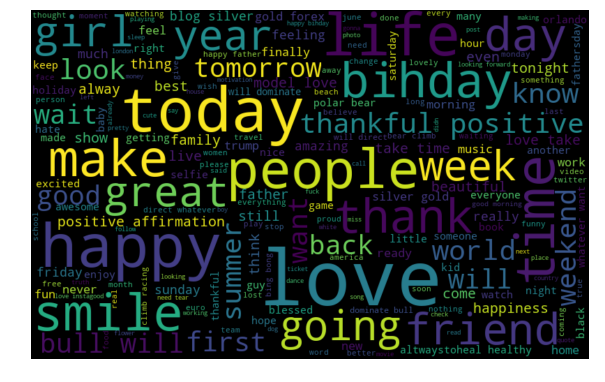

In [19]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

如上图所示，大多数单词是积极的或中立的，其中“happy”“love”最为常见，从它们身上我们找不到和仇恨言论有关的内容。所以接下来，我们会为标签为“1”和“0”的两类数据单独绘制WordCloud，并以此查看词频分布情况。

## 2. 非种族主义/性别歧视推文中的单词

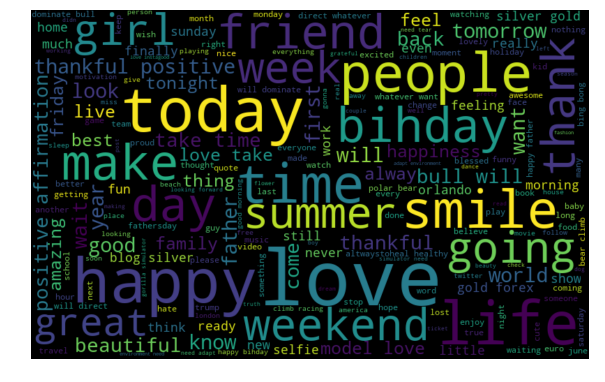

In [20]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

和之前一样，大多数词是积极的或中立的，其中“happy”“smile”“love”最常见。


## 3. 种族主义/性别歧视推文的单词

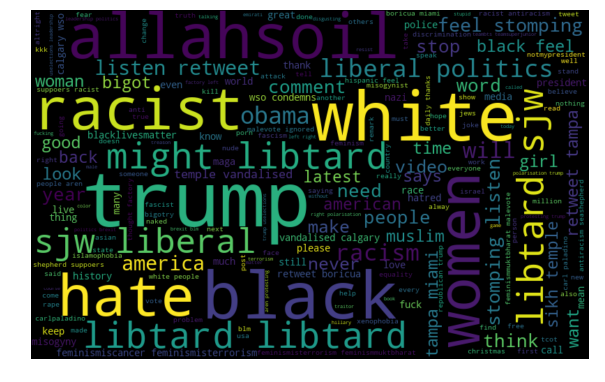

In [21]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

我们可以清楚地看到，大多数词语都有负面含义。这正好是一个非常出色的文本数据，之后我们可以基于它在twitter数据中添加主题标签/趋势。

## 4. 主题标签对推文情感的影响

In [22]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [23]:
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])